In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from collections import Counter

# Helper functions
def Average(lst): 
    return sum(lst) / len(lst)

def getData(fileName):
    file = open(fileName, "r")
    lines = file.readlines()
    file.close()
    
    N = int((len(lines)-1)/2)
    probs = [0]*N
    avgDay = [0]*N
    
    for i in range(N):
        probs[i] = float(lines[i].rstrip("\n"))
    
    for i in range(N):
        avgDay[i] = int(float(lines[N+1+i].rstrip("\n")))
        
        
    return probs, avgDay, N

In [72]:
def probDist(probsOne, probsThree, probsFive, probsSeven, N, name):
    probsOne.sort(reverse=True)
    probsThree.sort(reverse=True)
    probsFive.sort(reverse=True)
    probsSeven.sort(reverse=True)
    
    x = [i for i in range(N)]
    
    plt.plot(x, probsOne, label="p=0.1")
    plt.plot(x, probsThree, label="p=0.3")
    plt.plot(x, probsFive, label="p=0.5")
    plt.plot(x, probsSeven, label="p=0.7")
    
    plt.xlabel("Nodes")
    plt.ylabel("Probability of Infection")
    plt.title("Probability Distribution for Infection with p=0.1,0.3,0.5,0.7 - " + name)
    
    plt.legend()
    plt.show()

def readProb(probsOne, probsThree, probsFive, probsSeven, N, name):
    countOne = 0
    countThree = 0
    countFive = 0
    countSeven = 0
    
    for i in range(N):
        if(probsOne[i] != 0.0):
            countOne += 1
        if(probsThree[i] != 0.0):
            countThree += 1
        if(probsFive[i] != 0.0):
            countFive += 1
        if(probsSeven[i] != 0.0):
            countSeven += 1
    
    counts = [countOne, countThree, countFive, countSeven]
    
    print("Number of infected nodes")
    print("p=0.1 ->", countOne)
    print("p=0.3 ->", countThree)
    print("p=0.5 ->", countFive)
    print("p=0.7 ->", countSeven)
    
    probDist(probsOne, probsThree, probsFive, probsSeven, N, name)

In [62]:
def dayDist(avgOne, avgThree, avgFive, avgSeven, N, name):  
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].hist(avgOne, bins=max(avgOne))
    axs[0, 0].set_title('p=0.1')
    axs[0, 1].hist(avgThree, bins=max(avgThree))
    axs[0, 1].set_title('p=0.3')
    axs[1, 0].hist(avgFive, bins=max(avgFive))
    axs[1, 0].set_title('p=0.5')
    axs[1, 1].hist(avgSeven, bins=max(avgSeven))
    axs[1, 1].set_title('p=0.7')

    for ax in axs.flat:
        ax.set(xlabel='Day Infected', ylabel='Number of Nodes')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    fig.suptitle('Average Day of Infection - ' + name)
    
def readDays(daysOne, daysThree, daysFive, daysSeven, N, name):
    print("Average Days of Infection")
    print("p=0.1 ->", Average(daysOne))
    print("p=0.3 ->", Average(daysThree))
    print("p=0.5 ->", Average(daysFive))
    print("p=0.7 ->", Average(daysSeven))
    
    dayDist(daysOne, daysThree, daysFive, daysSeven, N, name)

In [50]:
def analyzeGrid(probs, days, fileOne, fileTwo, fileThree, fileFour, name):
    probsOne, avgDayOne, NOne = getData(fileOne)
    probsThree, avgDayThree, NThree = getData(fileTwo)
    probsFive, avgDayFive, NFive = getData(fileThree)
    probsSeven, avgDaySeven, NSeven = getData(fileFour)
    
    N = 0
    if (NOne != NThree or NOne != NFive or NOne != NSeven):
        return "Invalid input, different N values"
    else:
        N = NOne
        
    if (probs):
        print("Probability Analysis -", name)
        readProb(probsOne, probsThree, probsFive, probsSeven, N, name)
        print()
        
    if (days):
        print("Day Analysis -", name)
        readDays(avgDayOne, avgDayThree, avgDayFive, avgDaySeven, N, name)
        print()

In [51]:
def mainGridAnalysis(value):
    if (value == 0):
        analyzeGrid(True, False, "grid_1_01.txt", "grid_1_03.txt", "grid_1_05.txt", "grid_1_07.txt", "Grid 1")
        analyzeGrid(True, False, "grid_4_01.txt", "grid_4_03.txt", "grid_4_05.txt", "grid_4_07.txt", "Grid 4")
    elif (value == 1):
        analyzeGrid(False, True, "grid_1_01.txt", "grid_1_03.txt", "grid_1_05.txt", "grid_1_07.txt", "Grid 1")
        analyzeGrid(False, True, "grid_4_01.txt", "grid_4_03.txt", "grid_4_05.txt", "grid_4_07.txt", "Grid 4")
    else:
        print("Invalid Value")

Day Analysis - Grid 1
Average Days of Infection
p=0.1 -> 0.046875
p=0.3 -> 1.056640625
p=0.5 -> 30.6787109375
p=0.7 -> 18.8056640625

Day Analysis - Grid 4
Average Days of Infection
p=0.1 -> 0.08203125
p=0.3 -> 1.2744140625
p=0.5 -> 26.923828125
p=0.7 -> 17.1328125



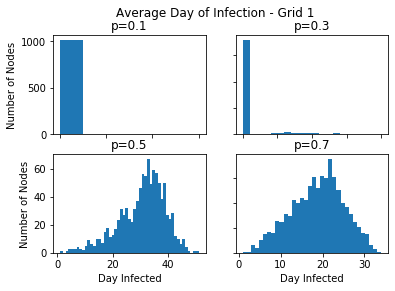

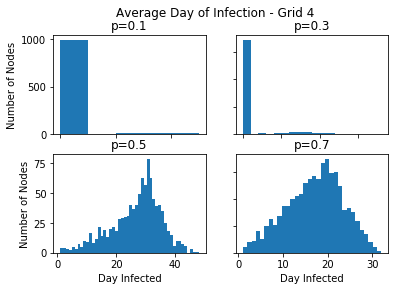

In [64]:
mainGridAnalysis(1)

In [55]:
def mainGridShortcuteAnalysis(value):
    if (value == 0):
        analyzeGrid(True, False, "grid_shortcut_1_01.txt", "grid_shortcut_1_03.txt", "grid_shortcut_1_05.txt", "grid_shortcut_1_07.txt", "Grid Shortcut 1")
        analyzeGrid(True, False, "grid_shortcut_4_01.txt", "grid_shortcut_4_03.txt", "grid_shortcut_4_05.txt", "grid_shortcut_4_07.txt", "Grid Shortcut 4")
    elif (value == 1):
        analyzeGrid(False, True, "grid_shortcut_1_01.txt", "grid_shortcut_1_03.txt", "grid_shortcut_1_05.txt", "grid_shortcut_1_07.txt", "Grid Shortcut 1")
        analyzeGrid(False, True, "grid_shortcut_4_01.txt", "grid_shortcut_4_03.txt", "grid_shortcut_4_05.txt", "grid_shortcut_4_07.txt", "Grid Shortcut 4")
    else:
        print("Invalid Value")

Day Analysis - Grid Shortcut 1
Average Days of Infection
p=0.1 -> 0.1083984375
p=0.3 -> 21.44921875
p=0.5 -> 9.72265625
p=0.7 -> 7.083984375

Day Analysis - Grid Shortcut 4
Average Days of Infection
p=0.1 -> 0.283203125
p=0.3 -> 17.34375
p=0.5 -> 8.2021484375
p=0.7 -> 6.1572265625



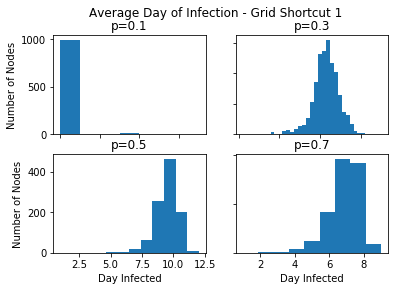

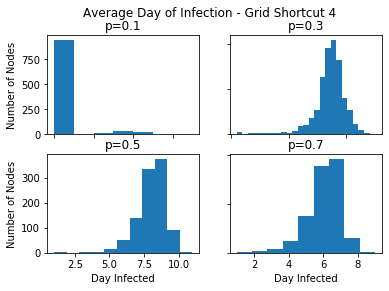

In [65]:
mainGridShortcuteAnalysis(1)

In [66]:
def mainSFAnalysis(value):
    if (value == 0):
        analyzeGrid(True, False, "scalefree_high_01.txt", "scalefree_high_03.txt", "scalefree_high_05.txt", "scalefree_high_07.txt", "Scalefree High")
        analyzeGrid(True, False, "scalefree_low_01.txt", "scalefree_low_03.txt", "scalefree_low_05.txt", "scalefree_low_07.txt", "Scalefree Low")
    elif (value == 1):
        analyzeGrid(False, True, "scalefree_high_01.txt", "scalefree_high_03.txt", "scalefree_high_05.txt", "scalefree_high_07.txt", "Scalefree High")
        analyzeGrid(False, True, "scalefree_low_01.txt", "scalefree_low_03.txt", "scalefree_low_05.txt", "scalefree_low_07.txt", "Scalefree Low")
    else:
        print("Invalid Value")

Day Analysis - Scalefree High
Average Days of Infection
p=0.1 -> 6.258
p=0.3 -> 3.961
p=0.5 -> 3.14
p=0.7 -> 3.031

Day Analysis - Scalefree Low
Average Days of Infection
p=0.1 -> 8.82
p=0.3 -> 5.175
p=0.5 -> 4.117
p=0.7 -> 3.688



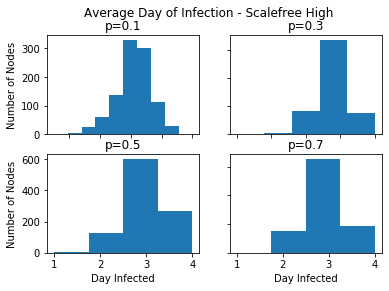

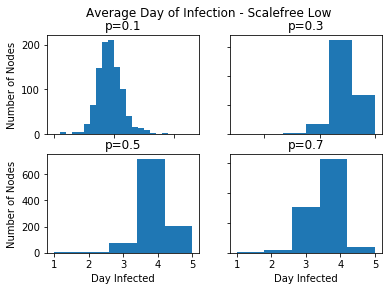

In [74]:
mainSFAnalysis(1)